In [1]:
%matplotlib notebook
import numpy as np

import torch
from torchdiffeq import odeint

import dynamicalsystems as dyns
import matplotlib.pyplot as plt

In [2]:
folder = 'HarmonicOscillator'

# Clean data

<IPython.core.display.Javascript object>


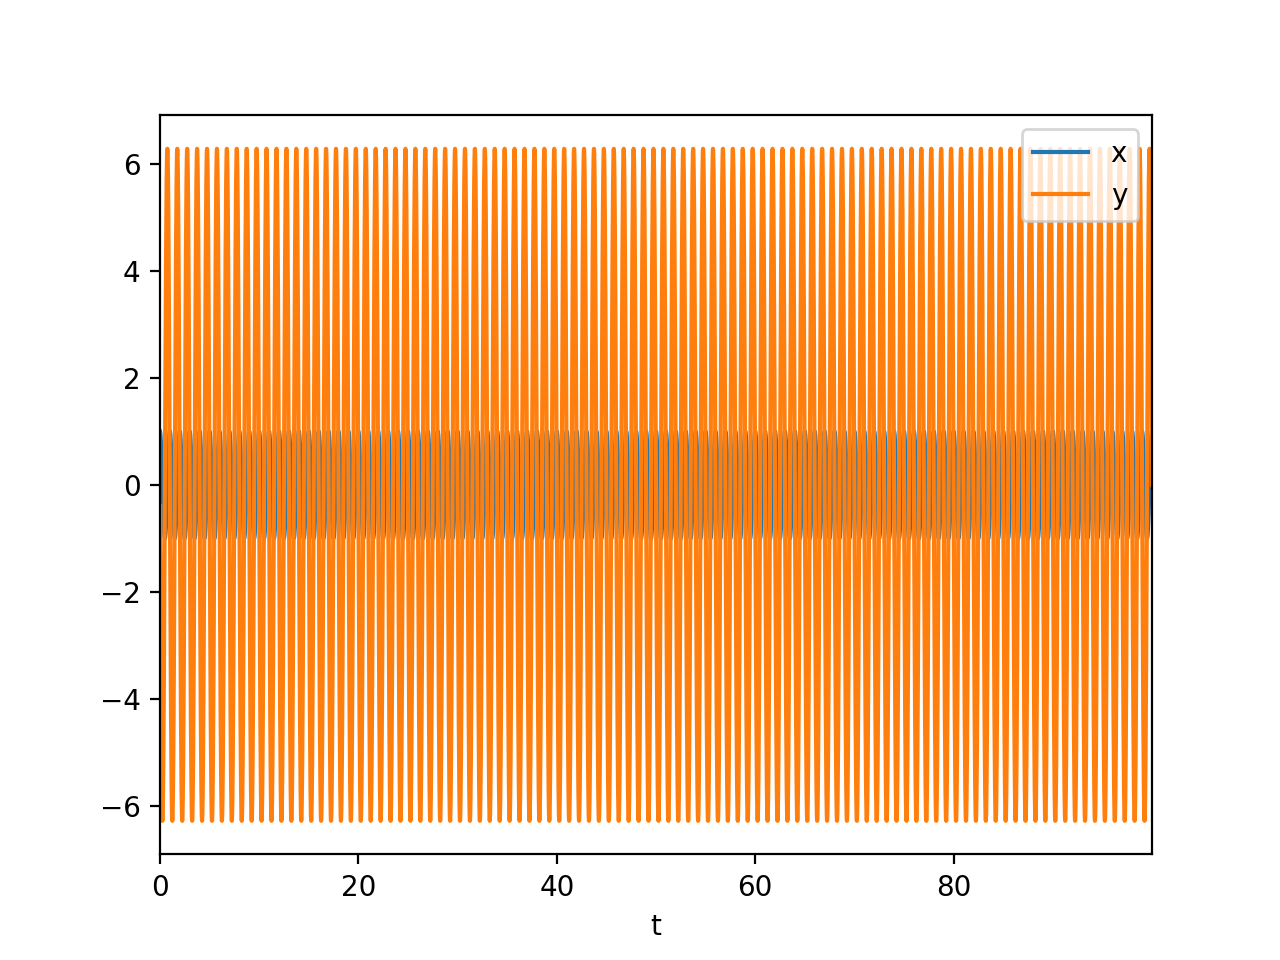

In [3]:
N_ts = 10000

t_true = torch.linspace(0, 120, 12001)
x_data = torch.tensor([1,0], dtype=torch.float32).reshape(1,-1) # Initial Condition
param  = [2*np.pi*1, 0.] # [ω, ζ]

dt  = t_true[1] - t_true[0]
fun = lambda t,x: dyns.DampedOscillator(x,t,param)

x_data = odeint(fun, x_data[0,:], t_true)
t_true = t_true[0:N_ts].reshape(-1,1)
x_data = x_data[-N_ts:,:]

    
fig = plt.figure()
axs = fig.add_subplot(1, 1, 1)
label = ['x','y','z']
[axs.plot(t_true, x_data[:,i], label = label[i]) for i in range(x_data.shape[1])]
axs.set_xlim([min(t_true), max(t_true)])
axs.set_xlabel('t')
plt.legend()
plt.show()

In [4]:
np.savetxt(folder+'/clean.txt', np.hstack([t_true.numpy(), x_data.numpy()]))

# Adding noise

In [5]:
σn = 2e-2 # fraction of (max-min)/2
x_noise = torch.zeros_like(x_data)
for i in range(x_data.shape[1]):
    σn_temp = σn*abs((max(x_data[:,i])-min(x_data[:,i]))/2)
    x_noise[:,i] = x_data[:,i] + torch.normal(0, σn_temp ,x_data[:,i].shape)

<IPython.core.display.Javascript object>


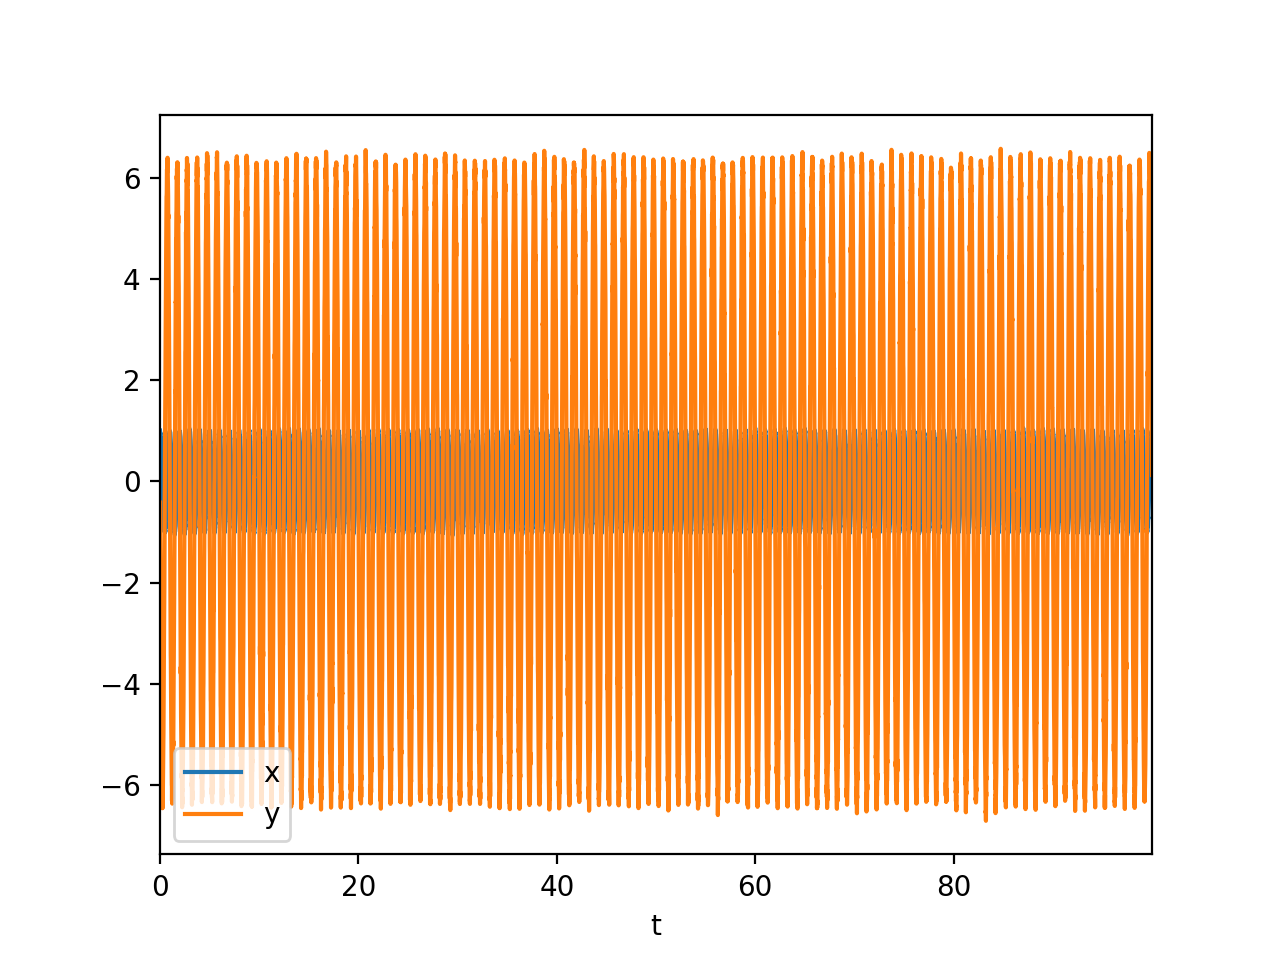

In [6]:
fig = plt.figure()
axs = fig.add_subplot(1, 1, 1)
label = ['x','y','z']
[axs.plot(t_true, x_noise[:,i], label = label[i]) for i in range(x_noise.shape[1])]
axs.set_xlim([min(t_true), max(t_true)])
axs.set_xlabel('t')
plt.legend()
plt.show()
np.savetxt(folder+'/noisy.txt', np.hstack([t_true.numpy(), x_noise.numpy()]))